In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

In [6]:
# Import relationship data
relationship_df = pd.read_csv('alice_relationship.csv', index_col = 0)
relationship_df.head()

,source,target,value
0,Alice,Caterpillar,7
1,Caterpillar,Alice,11
2,Alice,Duchess,11
3,Duchess,Alice,12
4,Alice,Hatter,17
5,Hatter,Dormouse,12
6,Dormouse,Hatter,5
7,Hatter,Alice,9
8,Alice,Queen,19
9,Queen,Duchess,4


In [7]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# Graph Visualization

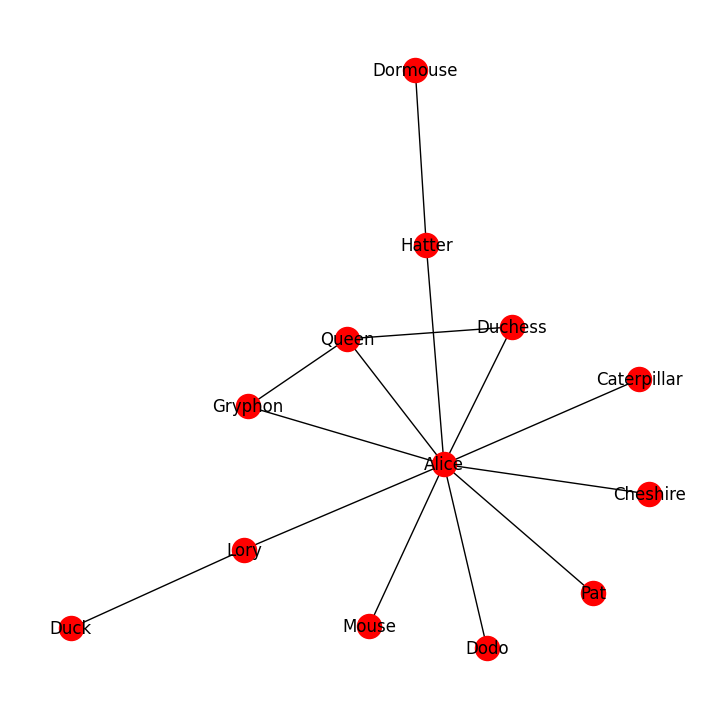

In [8]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

Visualization with Pyvis

In [12]:
# Define net object
net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("alice.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Community detection - Leiden algorithm

In [17]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [18]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [19]:
new_com = coms.to_node_community_map()

In [20]:
new_com

defaultdict(list,
            {'Alice': [0],
             'Caterpillar': [0],
             'Mouse': [0],
             'Dodo': [0],
             'Pat': [0],
             'Cheshire': [0],
             'Duchess': [1],
             'Queen': [1],
             'Gryphon': [1],
             'Hatter': [2],
             'Dormouse': [2],
             'Duck': [3],
             'Lory': [3]})

In [21]:
# Put the output from new_com into a dictionary
dict_com = {k:v[0] for k, v in new_com.items()}

In [23]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("alice_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Central Character

In [24]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Alice': 0.8333333333333333,
 'Caterpillar': 0.08333333333333333,
 'Duchess': 0.16666666666666666,
 'Hatter': 0.16666666666666666,
 'Dormouse': 0.08333333333333333,
 'Queen': 0.25,
 'Gryphon': 0.16666666666666666,
 'Duck': 0.08333333333333333,
 'Lory': 0.16666666666666666,
 'Mouse': 0.08333333333333333,
 'Dodo': 0.08333333333333333,
 'Pat': 0.08333333333333333,
 'Cheshire': 0.08333333333333333}

In [25]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['characters','centrality'])

In [26]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

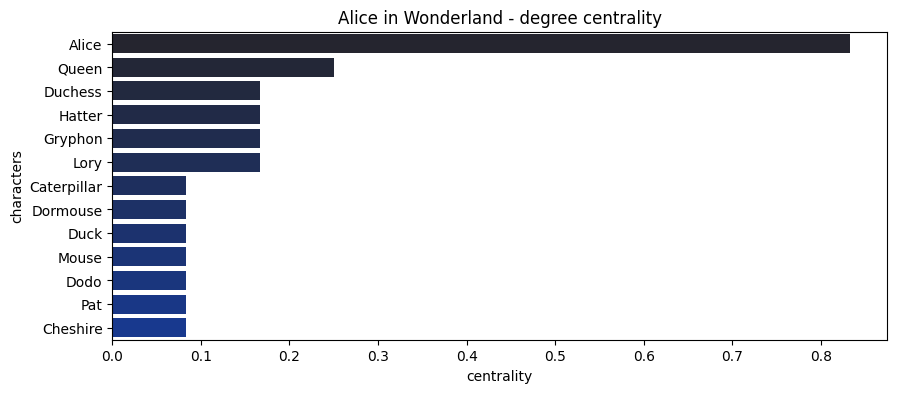

In [27]:
# Plot the degree centrality
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = degree_df).set_title("Alice in Wonderland - degree centrality")

In [28]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['characters','centrality'])

In [29]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

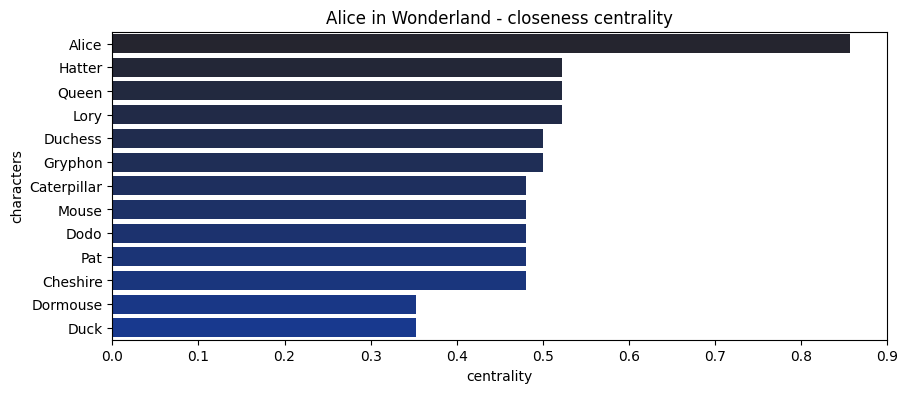

In [30]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = closeness_df).set_title("Alice in Wonderland - closeness centrality")

In [31]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['characters','centrality'])

In [32]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

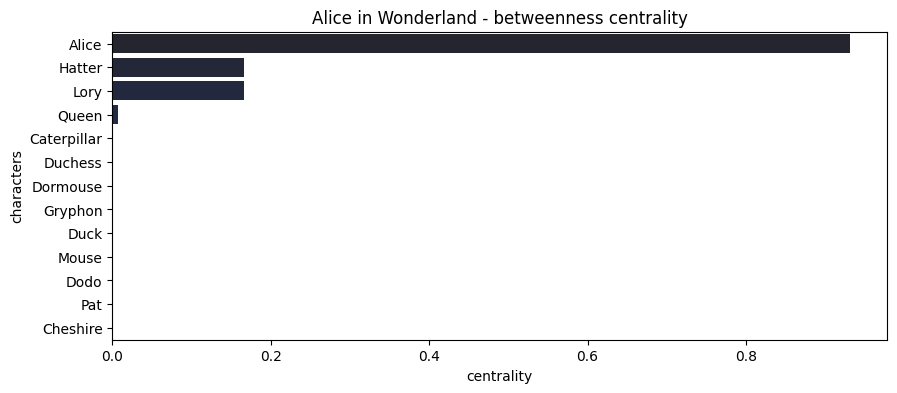

In [33]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = betweennes_df).set_title("Alice in Wonderland - betweenness centrality")

In [34]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')